In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_train=pd.read_csv('train_v9rqX0R.csv')
df_test=pd.read_csv('test_AbJTz2l.csv')
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [3]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df_test['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [5]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


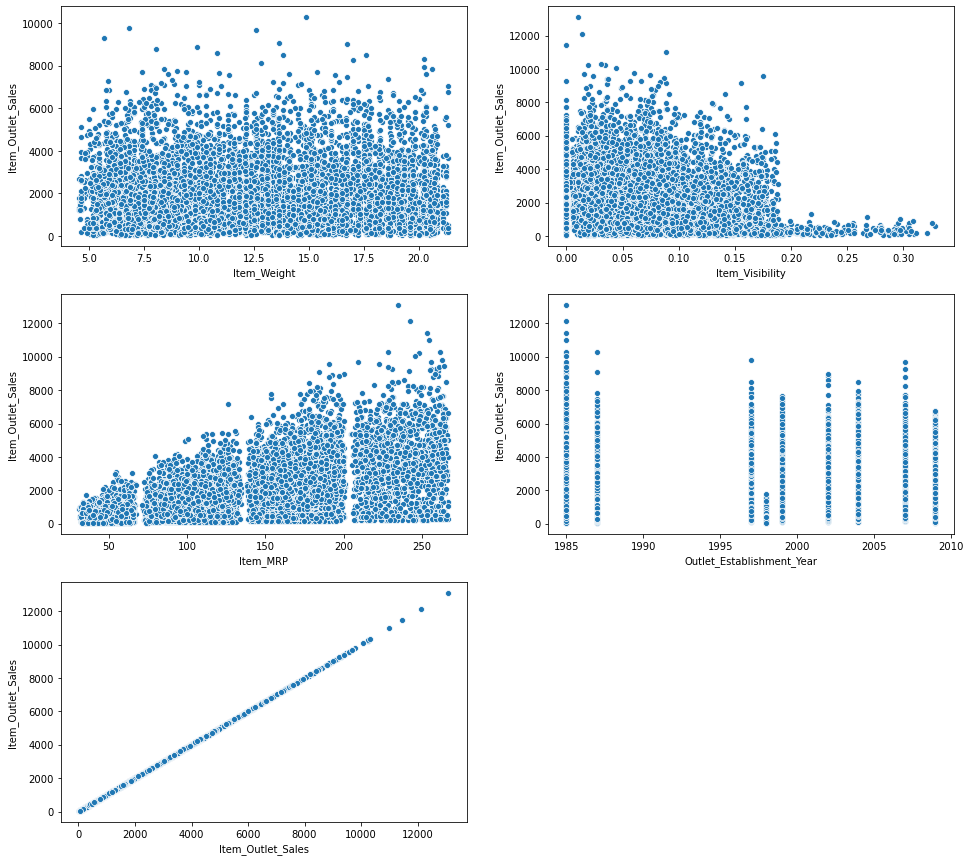

In [8]:
fig=plt.figure(figsize=(16,15))
i=1
for x in df_train.columns:
    if df_train[x].dtype != 'object':
        ax=fig.add_subplot(3,2,i)
        ax=sns.scatterplot(x,'Item_Outlet_Sales',data=df_train)
        i+=1

In [9]:
# fig=plt.figure(figsize=(16,15))
# plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.9, wspace=0.4)
# i=1
# for x in df_train.columns:
#     if df_train[x].dtype == 'object':
#         ax=fig.add_subplot(4,2,i)
#         ax=sns.boxplot(x,'Item_Outlet_Sales',data=df_train)
#         ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
#         i+=1

In [10]:
df_train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [11]:
df_train['Item_Fat_Content'].replace(['LF','low fat','reg'],['Low Fat','Low Fat','Regular'],inplace=True)
df_test['Item_Fat_Content'].replace(['LF','low fat','reg'],['Low Fat','Low Fat','Regular'],inplace=True)

In [12]:
df_train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

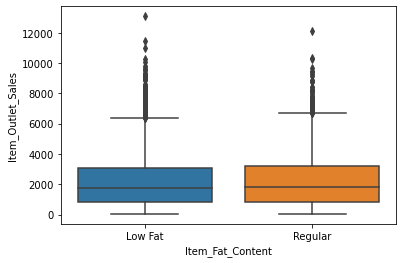

In [13]:
ax=sns.boxplot('Item_Fat_Content','Item_Outlet_Sales',data=df_train)

[Text(0, 0, 'Dairy'),
 Text(1, 0, 'Soft Drinks'),
 Text(2, 0, 'Meat'),
 Text(3, 0, 'Fruits and Vegetables'),
 Text(4, 0, 'Household'),
 Text(5, 0, 'Baking Goods'),
 Text(6, 0, 'Snack Foods'),
 Text(7, 0, 'Frozen Foods'),
 Text(8, 0, 'Breakfast'),
 Text(9, 0, 'Health and Hygiene'),
 Text(10, 0, 'Hard Drinks'),
 Text(11, 0, 'Canned'),
 Text(12, 0, 'Breads'),
 Text(13, 0, 'Starchy Foods'),
 Text(14, 0, 'Others'),
 Text(15, 0, 'Seafood')]

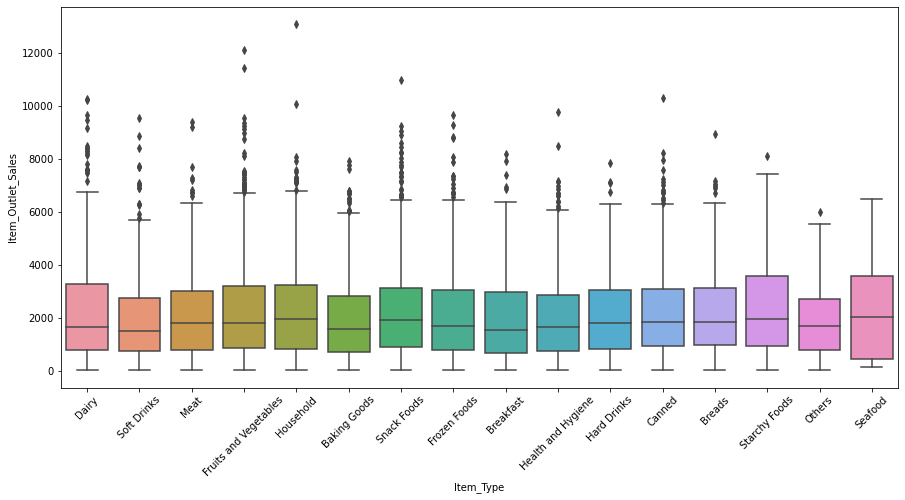

In [14]:
fig=plt.figure(figsize=(15,7))
ax=sns.boxplot('Item_Type','Item_Outlet_Sales',data=df_train)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

In [15]:
df_train['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
FDO19     9
NCQ06     9
FDP25     9
         ..
FDQ60     1
FDY43     1
FDK57     1
FDO33     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

### We fill na values in Item_Weight with mean values of its respective Item_Identifier

In [16]:
df_train["Item_Weight"] = df_train.groupby("Item_Identifier").transform(lambda x: x.fillna(x.mean()))
df_test["Item_Weight"] = df_train.groupby("Item_Identifier").transform(lambda x: x.fillna(x.mean()))

In [17]:
df_train[df_train['Item_Weight'].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [18]:
df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(),inplace=True)
df_test['Item_Weight'].fillna(df_train['Item_Weight'].mean(),inplace=True)

In [19]:
df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0],inplace=True)
df_test['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0],inplace=True)

In [20]:
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [21]:
df_train[df_train['Item_Visibility']==0]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.0,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.0,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
10,FDY07,11.800,Low Fat,0.0,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266
32,FDP33,18.700,Low Fat,0.0,Snack Foods,256.6672,OUT018,2009,Medium,Tier 3,Supermarket Type2,3068.0064
...,...,...,...,...,...,...,...,...,...,...,...,...
8480,FDQ58,7.315,Low Fat,0.0,Snack Foods,154.5340,OUT019,1985,Small,Tier 1,Grocery Store,459.4020
8484,DRJ49,6.865,Low Fat,0.0,Soft Drinks,129.9652,OUT013,1987,High,Tier 3,Supermarket Type1,2324.9736
8486,FDR20,20.000,Regular,0.0,Fruits and Vegetables,46.4744,OUT010,1998,Medium,Tier 3,Grocery Store,45.2744
8494,NCI54,15.200,Low Fat,0.0,Household,110.4912,OUT017,2007,Medium,Tier 2,Supermarket Type1,1637.8680


In [22]:
# df_train["Item_Visibility"].replace(0,(df_train.groupby("Item_Identifier").transform(lambda x: x.fillna(x.mean(axis=0)))),inplace=True)
# df_train['Item_Visibility']=df_train.groupby("Item_Identifier").transform(lambda x: x.replace(0,x.mean(axis=0)))

df_train["Item_Visibility"].replace(0,(df_train["Item_Visibility"].mean(axis=0)),inplace=True)
df_test["Item_Visibility"].replace(0,(df_test["Item_Visibility"].mean(axis=0)),inplace=True)

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

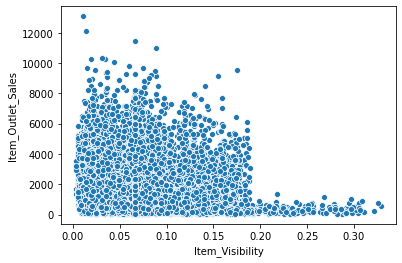

In [23]:
sns.scatterplot('Item_Visibility','Item_Outlet_Sales',data=df_train)

### Feature Engineering

In [24]:
df_train['Yrs-Of-Establieshment']=2013-df_train['Outlet_Establishment_Year']
df_test['Yrs-Of-Establieshment']=2013-df_test['Outlet_Establishment_Year']

In [25]:
df_test_original=df_test.copy()


In [26]:
df_train.drop(['Outlet_Establishment_Year','Item_Identifier'],axis=1,inplace=True)
df_test.drop(['Outlet_Establishment_Year','Item_Identifier'],axis=1,inplace=True)

# Encoding Categorical Variable

In [27]:
size={
    
    'Small' : 0,
    'Medium': 1,
    'High' : 2
}

In [28]:
location_type={
    
    'Tier 3' : 0,
    'Tier 2' : 1,
    'Tier 1' : 2
}

In [29]:
df_train['Outlet_Size_Ordinal']=df_train['Outlet_Size'].map(size)
df_test['Outlet_Size_Ordinal']=df_test['Outlet_Size'].map(size)

In [30]:
df_train['Outlet_Location_Type_Ordinal']=df_train['Outlet_Location_Type'].map(location_type)
df_test['Outlet_Location_Type_Ordinal']=df_test['Outlet_Location_Type'].map(location_type)

In [31]:
drop=['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Location_Type','Outlet_Type','Outlet_Size']

In [32]:
encoding=['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Type',]

In [33]:
dummies=pd.get_dummies(df_train[encoding],drop_first=True)
dummies_test=pd.get_dummies(df_test[encoding],drop_first=True)

In [34]:
df_train=df_train.drop(drop,axis=1)
df_test=df_test.drop(drop,axis=1)

In [35]:
df_train=pd.concat([df_train,dummies],axis=1)
df_test=pd.concat([df_test,dummies_test],axis=1)

# Transforming to Normal Distribution

In [36]:
import scipy.stats as stat
import pylab 

In [37]:
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

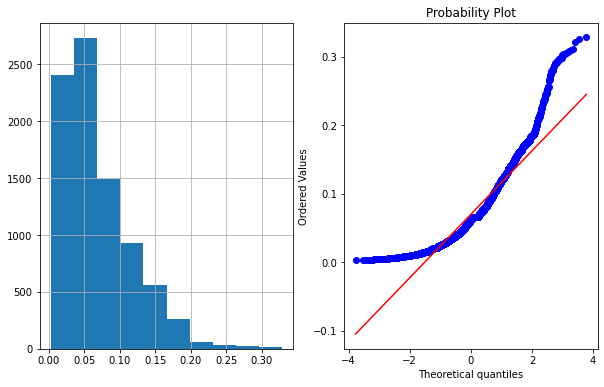

In [38]:
plot_data(df_train,'Item_Visibility')

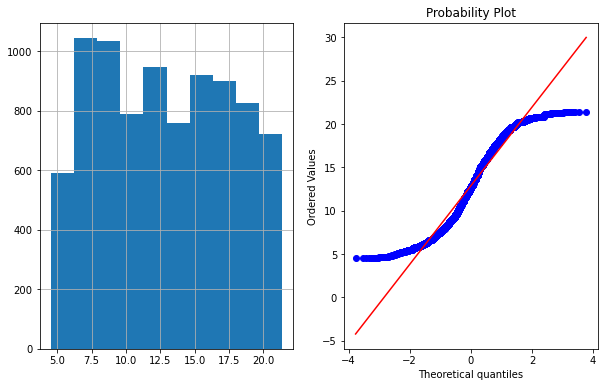

In [39]:
plot_data(df_train,'Item_Weight')

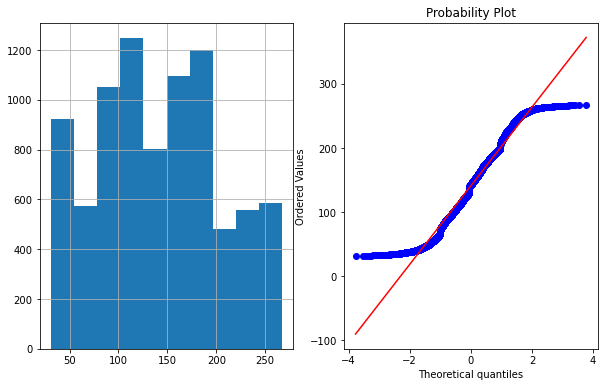

In [40]:
plot_data(df_train,'Item_MRP')

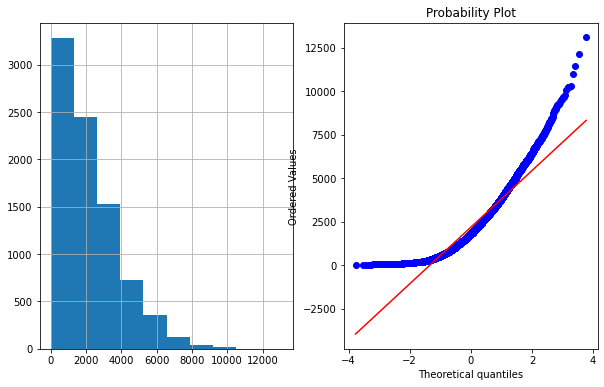

In [41]:
plot_data(df_train,'Item_Outlet_Sales')

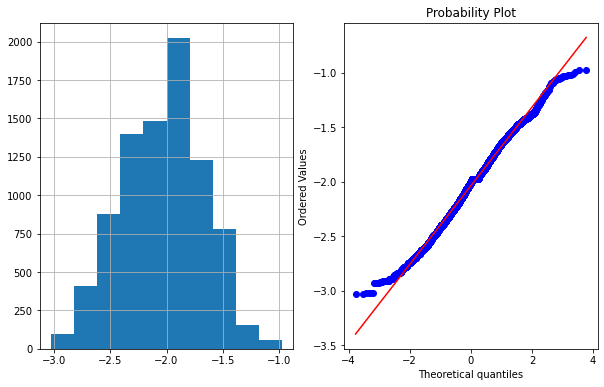

0.24903955448589588

In [42]:
df_train['Item_Visibility'],lambd=stat.boxcox(df_train['Item_Visibility'])
plot_data(df_train,'Item_Visibility')
lambd

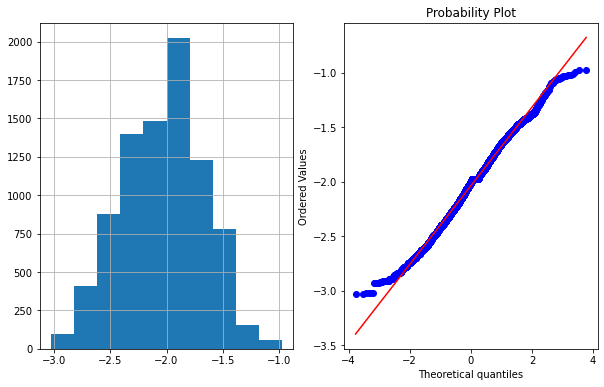

0.24755924659028522

In [43]:
df_test['Item_Visibility'],lambd=stat.boxcox(df_test['Item_Visibility'])
plot_data(df_train,'Item_Visibility')
lambd

In [44]:
# df_train['Item_Outlet_Sales'],lambd_sales=stat.boxcox(df_train['Item_Outlet_Sales'])
# plot_data(df_train,'Item_Outlet_Sales')
# print(lambd_sales)

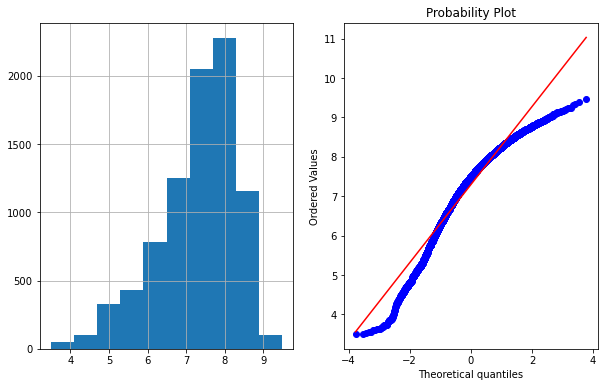

In [45]:
df_train['Item_Outlet_Sales']=np.log(df_train['Item_Outlet_Sales'])
plot_data(df_train,'Item_Outlet_Sales')


In [46]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
df_columns=df_test.columns
df_test=scaler.fit_transform(df_test)
df_test=pd.DataFrame(df_test,columns=df_columns)

In [47]:
X=df_train.drop('Item_Outlet_Sales',axis=1)
y=df_train['Item_Outlet_Sales']
# np.exp(y)

In [48]:
X_columns=X.columns
X=scaler.fit_transform(X)
# y=scaler.fit_transform(y)
X=pd.DataFrame(X,columns=X_columns)

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.35, random_state=2)

In [50]:
import tensorflow as tf

In [54]:
model1=tf.keras.models.Sequential([
    tf.keras.layers.Input(x_train.shape[1]),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(256,activation=tf.nn.relu),
    tf.keras.layers.Dense(512,activation=tf.nn.relu),
#     tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])

In [55]:
optimiser = tf.keras.optimizers.Adam(learning_rate=0.009)
model1.compile(optimizer=optimiser,loss='mse')

In [56]:
model1.fit(x_train,y_train,epochs=50)

Epoch 1/50
174/174 [==============================] - 0s 2ms/step - loss: 1.2761
Epoch 2/50
174/174 [==============================] - 0s 2ms/step - loss: 0.5273
Epoch 3/50
174/174 [==============================] - 0s 3ms/step - loss: 0.5085
Epoch 4/50
174/174 [==============================] - 1s 3ms/step - loss: 0.5019
Epoch 5/50
174/174 [==============================] - 0s 3ms/step - loss: 0.3905A: 0s - loss:
Epoch 6/50
174/174 [==============================] - 0s 3ms/step - loss: 0.3484
Epoch 7/50
174/174 [==============================] - ETA: 0s - loss: 0.376 - 0s 3ms/step - loss: 0.3769
Epoch 8/50
174/174 [==============================] - 0s 3ms/step - loss: 0.3301
Epoch 9/50
174/174 [==============================] - 0s 3ms/step - loss: 0.3190
Epoch 10/50
174/174 [==============================] - 1s 3ms/step - loss: 0.3239
Epoch 11/50
174/174 [==============================] - 0s 3ms/step - loss: 0.2963
Epoch 12/50
174/174 [==============================] - 0s 3ms/step - l

In [57]:
model1.evaluate(x_test,y_test)

94/94 [==============================] - 0s 1ms/step - loss: 0.4044


0.40444400906562805